In [7]:
%matplotlib notebook
from itertools import cycle
from math import hypot
import random
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class DBSCAN:
    
    def __init__(self, data, eps, m):
    
        self.dist = lambda x, y: hypot(x[0] - y[0], x[1] - y[1])

        self.data = data
        self.eps = eps
        self.m = m

        self.NOISE = 0
        self.C = 0

        self.visitedPoints = set()
        self.clusteredPoints = set()
        self.clusters = {self.NOISE: []}

    def regionQuery(self, point):
        return [q for q in self.data if self.dist(point, q) < eps]
    
    def expandCluster(self, point, neighbours):
        
        if self.C not in self.clusters:
            self.clusters[self.C] = []
        self.clusters[self.C].append(point)
        self.clusteredPoints.add(point)
        while neighbours:
            q = neighbours.pop()
            if q not in self.visitedPoints:
                self.visitedPoints.add(q)
                n = self.regionQuery(q)
                if len(n) > m:
                    neighbours.extend(n)
            if q not in self.clusteredPoints:
                self.clusteredPoints.add(q)
                self.clusters[self.C].append(q)
                if q in self.clusters[self.NOISE]:
                    self.clusters[self.NOISE].remove(q)
                    
    def execute(self):
        for p in self.data:
            if p in self.visitedPoints:
                continue
            self.visitedPoints.add(p)
            neighbours = self.regionQuery(p)
            if len(neighbours) < m:
                self.clusters[self.NOISE].append(p)
            else:
                self.C += 1
                self.expandCluster(p, neighbours)

In [53]:
data = list(map(tuple, np.random.uniform(-5, 5, (150, 2)).tolist()))
eps = 1
m = 7

In [54]:
dbscan = DBSCAN(data, eps, m)
dbscan.execute()

In [55]:
clusters = dbscan.clusters

<IPython.core.display.Javascript object>


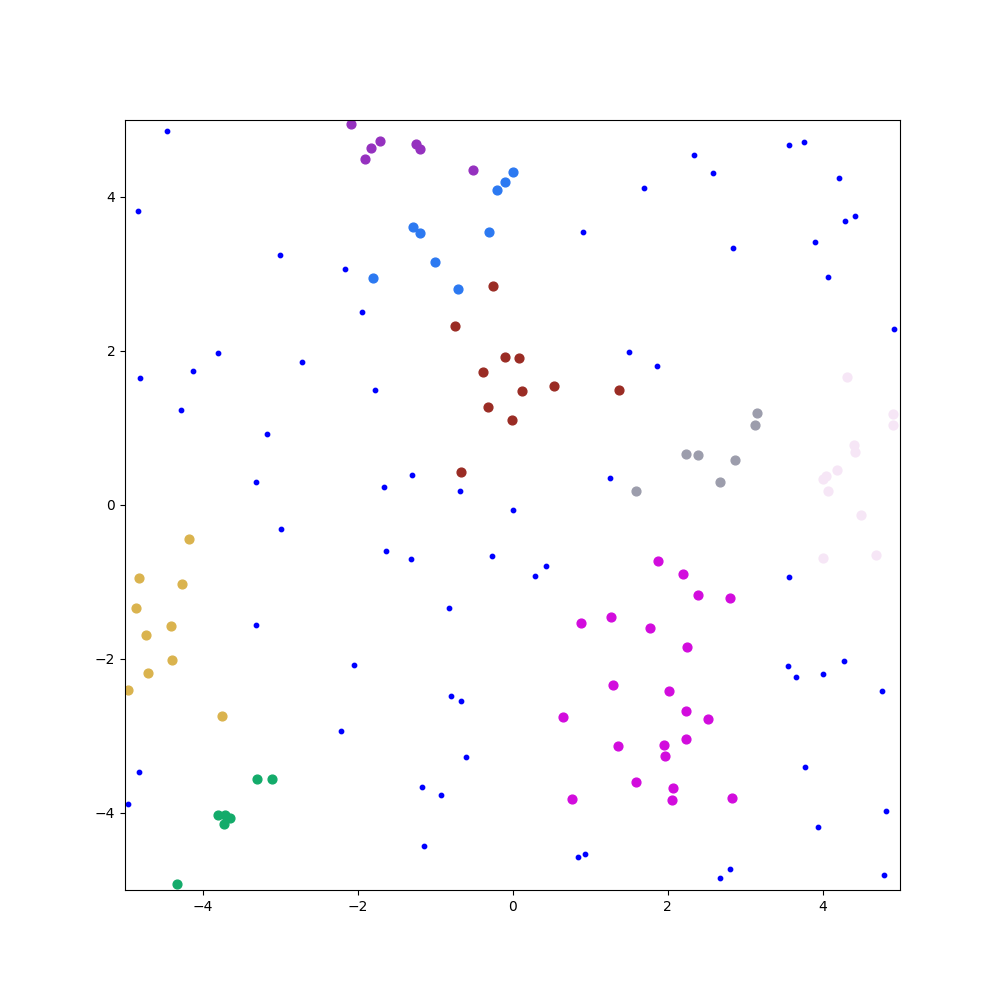

In [56]:
figA = plt.figure(figsize=(10, 10))
axA = figA.add_subplot()

plt.xlim(-5, 5)
plt.ylim(-5, 5)

scats = [axA.scatter([], [], s=40, c="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])) for i in range(len(clusters))]
scat = axA.scatter([], [], s=10, c='blue')

scat.set_offsets(clusters[0])
for i in range(1, len(clusters)):
    scats[i].set_offsets(clusters[i])